<a href="https://colab.research.google.com/github/aditibansal17/Bird_Classification/blob/main/Bird_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Uploading kaggle.json

In [ ]:
from google.colab import files
my_file=files.upload()

Saving kaggle.json to kaggle.json


setting up environment

In [ ]:
# Colab setup ------------------
import os
import pandas as pd
cred = pd.read_json("kaggle.json",lines=True)
os.environ['KAGGLE_USERNAME'] = cred.iloc[0][0]
os.environ['KAGGLE_KEY'] = cred.iloc[0][1]

Downloading dataset

In [ ]:
!kaggle datasets download -d gpiosenka/100-bird-species

 99% 1.16G/1.17G [00:08<00:00, 139MB/s]
100% 1.17G/1.17G [00:08<00:00, 141MB/s]


unzipping dataset

In [ ]:
!unzip "*.zip"

Streaming output truncated to the last 5000 lines.
  inflating: train/TURQUOISE MOTMOT/043.jpg  
  inflating: train/TURQUOISE MOTMOT/044.jpg  
  inflating: train/TURQUOISE MOTMOT/045.jpg  
  inflating: train/TURQUOISE MOTMOT/046.jpg  
  inflating: train/TURQUOISE MOTMOT/047.jpg  
  inflating: train/TURQUOISE MOTMOT/048.jpg  
  inflating: train/TURQUOISE MOTMOT/049.jpg  
  inflating: train/TURQUOISE MOTMOT/050.jpg  
  inflating: train/TURQUOISE MOTMOT/051.jpg  
  inflating: train/TURQUOISE MOTMOT/052.jpg  
  inflating: train/TURQUOISE MOTMOT/053.jpg  
  inflating: train/TURQUOISE MOTMOT/054.jpg  
  inflating: train/TURQUOISE MOTMOT/055.jpg  
  inflating: train/TURQUOISE MOTMOT/056.jpg  
  inflating: train/TURQUOISE MOTMOT/057.jpg  
  inflating: train/TURQUOISE MOTMOT/058.jpg  
  inflating: train/TURQUOISE MOTMOT/059.jpg  
  inflating: train/TURQUOISE MOTMOT/060.jpg  
  inflating: train/TURQUOISE MOTMOT/061.jpg  
  inflating: train/TURQUOISE MOTMOT/062.jpg  
  inflating: train/TURQUOISE 

making a directory to store all the test images

In [ ]:
os.makedirs('test1')

importing important libraries

In [ ]:
import dlib
import cv2
from imutils import face_utils
from PIL import Image

storing images in test1 folder

In [ ]:
inm=[]
j=0
tfiles=os.listdir("/content/test")
for file in tfiles:
  tfile1=os.listdir("/content/test/"+file)
  i=0
  for x in tfile1:
    if i==400:
      break
    else:
      colorImage  = Image.open("/content/test/"+file+"/"+x)
      #os.makedirs("/content/itsnotme/anushka"+str(j)+".jpg")
      colorImage.save("/content/test1/"+str(j)+".jpg")
      i+=1
      j+=1

importing fastai vision library and ignoring all the unnecessary warnings

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
from fastai.metrics import error_rate
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

setting batch size as 64

In [ ]:
bs=64

creating data bunch

In [ ]:
path=""
tfms = get_transforms(do_flip=True)
data = ImageDataBunch.from_folder( Path("/content/train"), valid_pct=0.2, bs=64, size=224)

showing data bunch

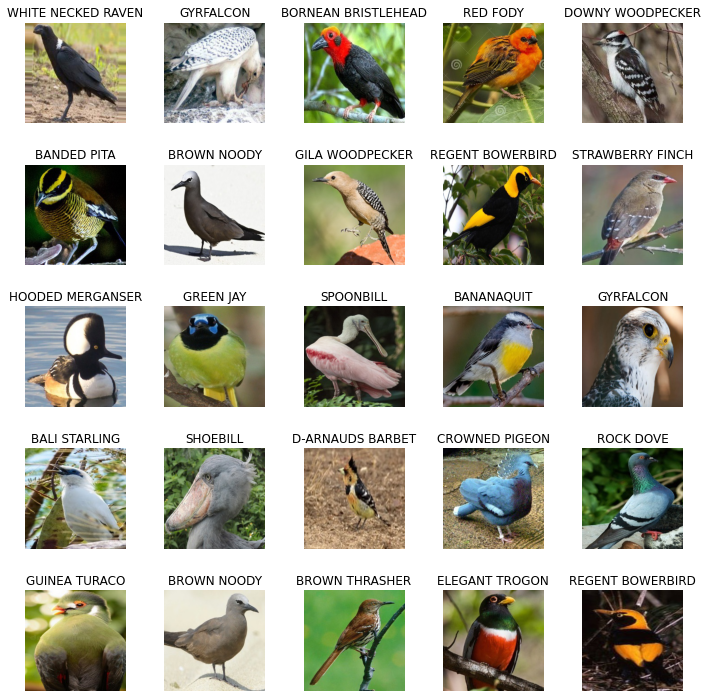

In [ ]:
data.show_batch(rows=5, figsize=(10,10))

analysing dataset

In [ ]:
print(data.classes)
len(data.classes)

['AFRICAN CROWNED CRANE', 'AFRICAN FIREFINCH', 'ALBATROSS', 'ALEXANDRINE PARAKEET', 'AMERICAN AVOCET', 'AMERICAN BITTERN', 'AMERICAN COOT', 'AMERICAN GOLDFINCH', 'AMERICAN KESTREL', 'AMERICAN PIPIT', 'AMERICAN REDSTART', 'ANHINGA', 'ANNAS HUMMINGBIRD', 'ANTBIRD', 'ARARIPE MANAKIN', 'ASIAN CRESTED IBIS', 'BALD EAGLE', 'BALD IBIS', 'BALI STARLING', 'BALTIMORE ORIOLE', 'BANANAQUIT', 'BANDED BROADBILL', 'BANDED PITA', 'BAR-TAILED GODWIT', 'BARN OWL', 'BARN SWALLOW', 'BARRED PUFFBIRD', 'BAY-BREASTED WARBLER', 'BEARDED BARBET', 'BEARDED BELLBIRD', 'BEARDED REEDLING', 'BELTED KINGFISHER', 'BIRD OF PARADISE', 'BLACK & YELLOW bROADBILL', 'BLACK BAZA', 'BLACK FRANCOLIN', 'BLACK SKIMMER', 'BLACK SWAN', 'BLACK TAIL CRAKE', 'BLACK THROATED BUSHTIT', 'BLACK THROATED WARBLER', 'BLACK VULTURE', 'BLACK-CAPPED CHICKADEE', 'BLACK-NECKED GREBE', 'BLACK-THROATED SPARROW', 'BLACKBURNIAM WARBLER', 'BLONDE CRESTED WOODPECKER', 'BLUE COAU', 'BLUE GROUSE', 'BLUE HERON', 'BLUE THROATED TOUCANET', 'BOBOLINK', 'BO

325

Creating a model to get trained...

And here about the paramters like

*data *--> databunch we have created(converting data in a format so that it can be trained)

models.resnet50 -->resnet50 model will be used.

metrices --> it shows accuracy after each epoch so that we can see how well our model is doing.

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)


Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

training model

In [ ]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,1.028500,0.590947,0.845236,10:35
1,0.596547,0.366853,0.906085,10:25
2,0.345080,0.257043,0.935453,10:23
3,0.176565,0.235603,0.943693,10:26


unfreezing our model and plotting learning rate v/s loss graph

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


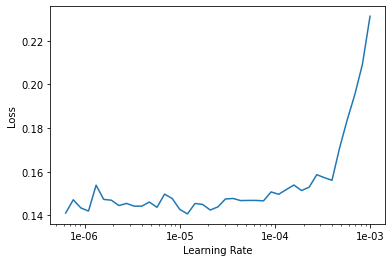

In [ ]:
learn.unfreeze() 
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(2, max_lr=slice(1e-5,1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.176638,0.221566,0.944644,14:07
1,0.092418,0.201660,0.951088,14:07


printing our confusion matrix

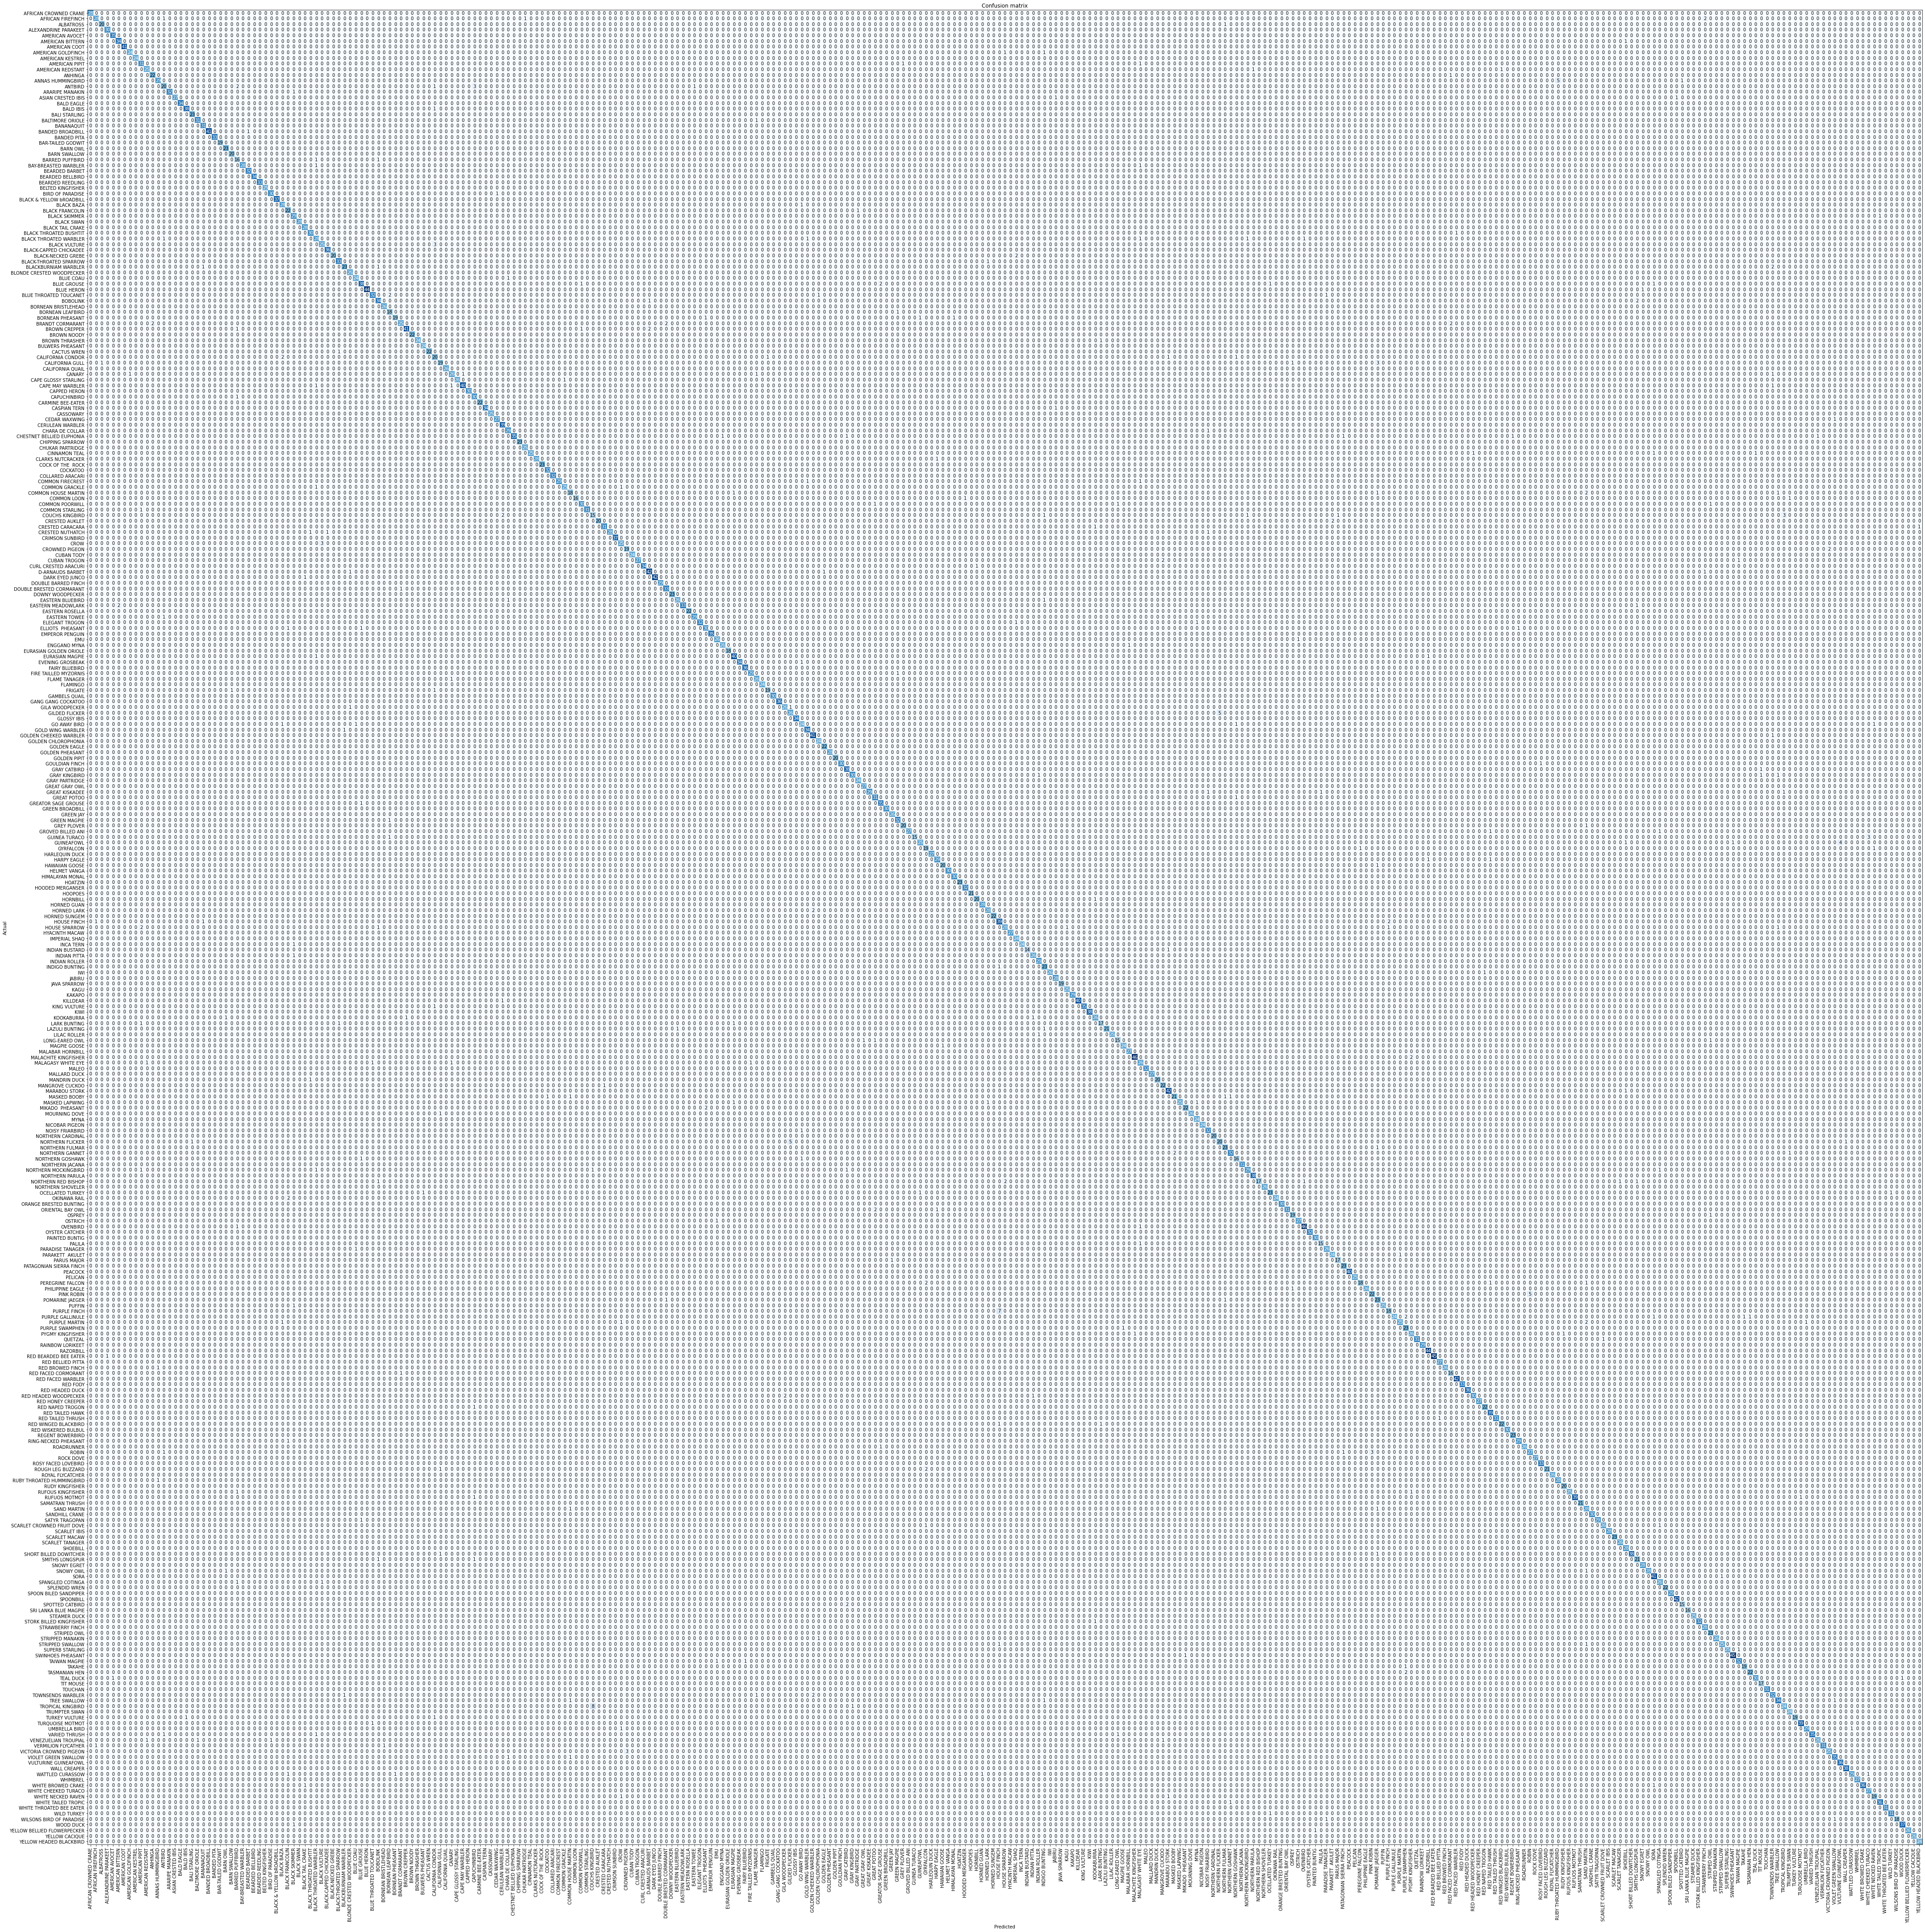

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
fig = interp.plot_confusion_matrix(figsize=(60,60))

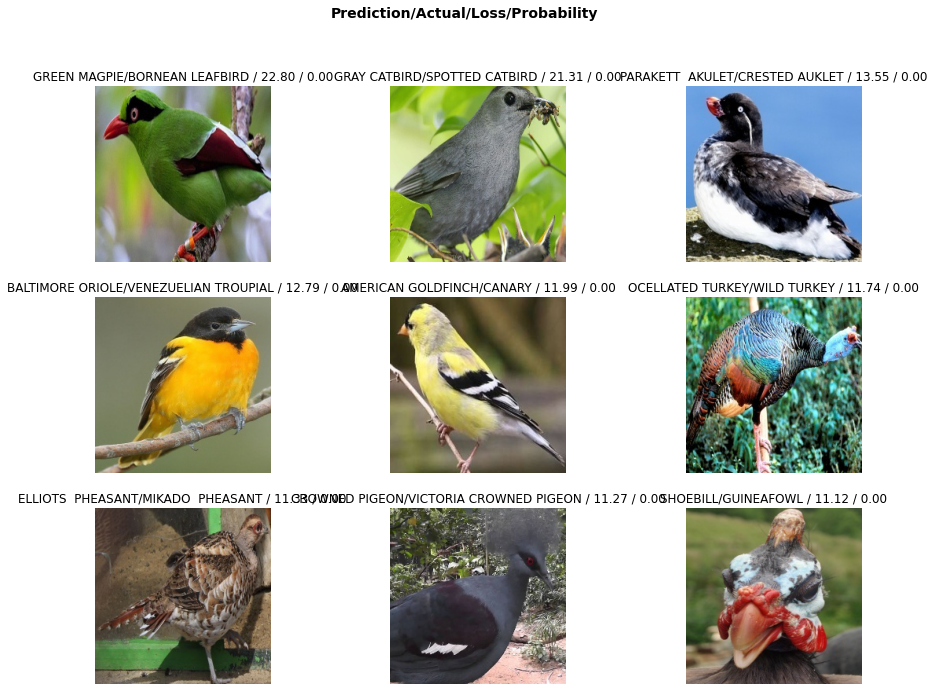

In [ ]:
interp.plot_top_losses(9, figsize=(15,11))

saving our model as stage-1.pth , it contains all the information of training so far

In [ ]:
os.makedirs("/content/birds/",exist_ok=True)

In [ ]:
my_dir="/content/birds/"

In [ ]:
learn.save(my_dir+"/stage-1")

In [ ]:
learn.export(my_dir+"/export.pkl")

In [ ]:
predictor = load_learner(my_dir)

In [ ]:
root_dir = "/content/drive/MyDrive/"

In [ ]:
dest=Path(root_dir + "birds/models/")

In [ ]:
 dest.mkdir(parents=True, exist_ok=False)

In [ ]:
learn.save(dest/"stage-1")

In [ ]:
learn.export(dest/"export.pkl")